# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [29]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

In [4]:
df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


#### 1. Is the distribution of body temperatures normal?

In [35]:
t = df.temperature
stats.normaltest(t)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

C:\Users\conee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


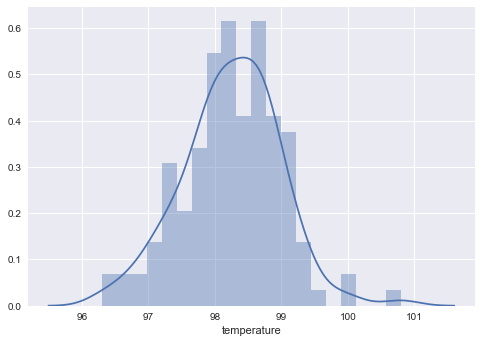

In [24]:
sns.distplot(t,20)

Per normaltest pvalue > .05 and visual analysis of distribution, temperature distribution is reasonably normal.

In [22]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


Mean body temp of the sample is 98.2F.

#### 2. Is the sample size large? Are the observations independent?

As the sample size n=130, which, when using the Central Limit Theorem, we can safely say the sample size is large. 

#### 3. Is the true population mean 98.6 degrees F?
* Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the  tt  or  zz  statistic?
* Now try using the other test. How is the result be different? Why?

For sample sizes greater than 30 we can assume the population mean to be equal to the sample mean. We use a 1-sample test because the entire sample is in one group. If/when the groups are divided by male and female, the groups would be independent and we would then use a 2-sample test.

In this situation it might be appropriate to use the z-statistic because the sammple size is significantly over 30. 

In [80]:
tt = stats.ttest_1samp(t,98.6) # Null hypothesis is mean=98.6F
p = tt[1]
print('P-value = {}'.format(p))

P-value = 2.4106320415561276e-07


P value below .05 says to reject null hypothesis, therefore mean temp is not 98.6.

Z-test:  Determine 95% confidence interval:

In [32]:
z = 1.96
pop_mean = 98.6
sample_sd = df.temperature.sort_values().std()
pop_sd = ((sample_sd**2)/len(df.temperature))**0.5
conf_interval = (pop_mean - z*pop_sd, pop_mean + z*pop_sd)
print ('Confidence Interval: {}'.format(conf_interval))

Confidence Interval: (98.47396334299773, 98.72603665700225)


Z-test result:  The actual sample mean is outside the 95% confidence interval for a mean of 98.6, so we reject the null hypothesis.

T-test: Determine 95% confidence interval:

In [71]:
tscore = 1.98
pop_mean = 98.6
sample_sd = df.temperature.sort_values().std()
pop_sd = ((sample_sd**2)/len(df.temperature))**0.5
conf_interval = (pop_mean - tscore*pop_sd, pop_mean + tscore*pop_sd)
print ('Confidence Interval: {}'.format(conf_interval))

Confidence Interval: (98.47267725466097, 98.72732274533902)


T-test result:  The actual sample mean is outside the 95% confidence interval for a mean of 98.6, so we reject the null hypothesis.

The confidence interval for the t-test is slightly wider, but insignificant to change the outcome. Either way we reject the null hypothesis.

#### 4. At what temperature should we consider someone's temperature to be "abnormal"?
* Start by computing the margin of error and confidence interval.

In [69]:
z = 2.58
pop_mean = df.temperature.mean()
sample_sd = df.temperature.sort_values().std()
pop_sd = ((sample_sd**2)/len(df.temperature))**0.5
conf_interval = (pop_mean - z*pop_sd, pop_mean + z*pop_sd)
print ('Confidence Interval: {}'.format(conf_interval))

Confidence Interval: (98.08332537378902, 98.41513616467253)


In [70]:
margin = z*pop_sd
print ('Margin of error = ' + str(pop_mean) + ' +/-' + ' {}'.format(margin))

Margin of error = 98.24923076923078 +/- 0.16590539544175878


With 95% confidence, a person's temperature should be considered abnormal if it outside the range of 98.1 to 98.3.

#### 5. Is there a significant difference between males and females in normal temperature?
* What test did you use and why?
* Write a story with your conclusion in the context of the original problem.

In [37]:
temp_male=df.temperature[df.gender=='M']
temp_female=df.temperature[df.gender=='F']
stats.ttest_ind(temp_male,temp_female)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

Used a t-test because we are comparing the mean of two groups (male and female). The p-value below 0.05 indicates that this difference would not happen very often by pure chance, and so we reject the null hypothesis that there is no difference and state that there is a significant difference between the average male temperature and the average female temperature.